<a href="https://colab.research.google.com/github/bobg207/Honors_Data_Analysis/blob/master/weather_plots_sltn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount the drive

The path to drive is '/content/drive'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Display the contents of the folder where the data exists

Use `!ls` followed by the path to the folder containg the data file.  Be sure to escape `\` any special characters, like spaces, that might be part of a folder name. The path to the folder begins with the path used above.

In [2]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/*.txt

'/content/drive/My Drive/Colab Notebooks/address.txt'
'/content/drive/My Drive/Colab Notebooks/Euro_2012_Team_Stats.txt'
'/content/drive/My Drive/Colab Notebooks/PortlandWeather2013b.txt'
'/content/drive/My Drive/Colab Notebooks/qb_data_2.txt'


# Create a convert_temp function

The temperatures, in the data, are in degrees Celsius and mulitplied by 10 so there are no decimals in the data.  Create a function to convert a given temp to a temp in degrees Fahrenheit, rounded to one decimal place.



In [3]:
def temp_convert(temp):
  convert_decimal = int(temp)/10
  convert_temp = round(1.8 * convert_decimal + 32, 1)
  return convert_temp


# Read the data from the file

Create the path (should be the one use above, with the specific file that you will read from).

Use this path to read the dat from the file.  Decide how you will do this and what format would you like the data returned as.

Spend some time looking at the data and deciding how you will "clean" the data.  


1.   What are the data types currently and what do you want them to be
2.   What data do you want and how will you store the data you choose
3.   How will you convert the data that needs changing
4.   Is there any missing or unusual data? How will you handle this?
5.   Other?

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/PortlandWeather2013b.txt'

with open(path) as file:
  data_list = file.readlines()

data_list

# Cleaning the Data

In this text cell explain your decisions based on what you saw in the data.  Organize your explanations so it is clear what your intent is and what code should be seen in the code cell that follows.

In [12]:
weather_dict = {}
dates = []
precip = []
snow = []
max_temp = []
min_temp = []

for line in data_list[2:]:

  data = line.split()

  month = data[1][4:6]
  day = data[1][6:]
  date = f'{month}/{day}'
  dates.append(date)

  snow_inch = round(int(data[4]) / 25.4, 1)
  precip_inch = round(int(data[2]) / 25.4, 1)
  precip.append(precip_inch)
  snow.append(snow_inch)

  max_temp_f = temp_convert(data[5])
  min_temp_f = temp_convert(data[6])
  max_temp.append(max_temp_f)
  min_temp.append(min_temp_f)

weather_dict['dates'] = dates
weather_dict['precip'] = precip
weather_dict['snow'] = snow
weather_dict['max_temp'] = max_temp
weather_dict['min_temp'] = min_temp

In [ ]:
print(weather_dict)

# Plotting Data

## Subplots of Daily High and Daily Low Temperatures
1. Create a Numpy array of numbers from 1 - 365, to be used for the x-axis 
2. x- and y-axes should share the same values
3. label the axes and title the plot
4. use a scatterplot to display the data

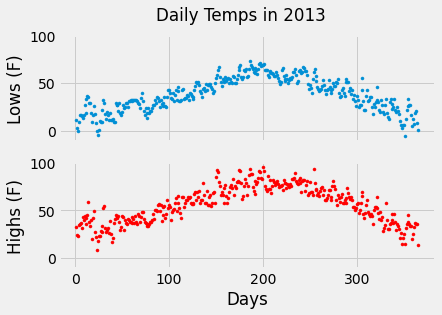

<Figure size 1080x1296 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")

x_ticks = np.arange(1, 366)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Daily Temps in 2013')
plt.figure(figsize=(15, 18))

ax1.set_ylabel("Lows (F)")
ax1.scatter(x_ticks, min_temp, marker='.')

ax2.set_ylabel("Highs (F)")
ax2.set_xlabel('Days')
ax2.scatter(x_ticks, max_temp, marker='.', color='red')

plt.tight_layout()

# plt.show()